In [31]:
import igl
import math
import scipy as sp
import numpy as np
import meshplot as mp
import pandas as pd
import matplotlib.pyplot as plt
import numba
import os
root_folder = os.getcwd()

In [1]:


# Open the file for reading
with open('Adhesion_Force.txt', 'r') as f:
    # Read the contents of the file
    contents = f.read()
    
    # Split the contents by line and convert each line to a list of floats
    lines = contents.split('\n')
    rows = [[float(x) for x in line.split()] for line in lines if line]
    
    # Convert the rows to a numpy array
    mat_adhesion = np.array(rows)
    
with open('Bending_Force.txt', 'r') as f:
    # Read the contents of the file
    contents = f.read()
    
    # Split the contents by line and convert each line to a list of floats
    lines = contents.split('\n')
    rows = [[float(x) for x in line.split()] for line in lines if line]
    
    # Convert the rows to a numpy array
    mat_bending = np.array(rows)
    

FileNotFoundError: [Errno 2] No such file or directory: 'Adhesion_Force.txt'

In [33]:

v, f = igl.read_triangle_mesh(os.path.join(root_folder, "equilibrioum.off"))### Read The Final Mesh Here


v_init, f = igl.read_triangle_mesh(os.path.join(root_folder, "equilibrated.off") ) ### Read The Initial Mesh Here                         

In [34]:
p=mp.plot(v,f,shading={"wireframe":True, "wire_color": "black", #Wireframerendering   
           "width": 300, "height": 300},return_plot=True) ###Viewing The Mesh

# Add the vector field to the viewer
p.add_lines(v, v+10*mat_adhesion,shading=dict(line_color='red'))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.029377…

1

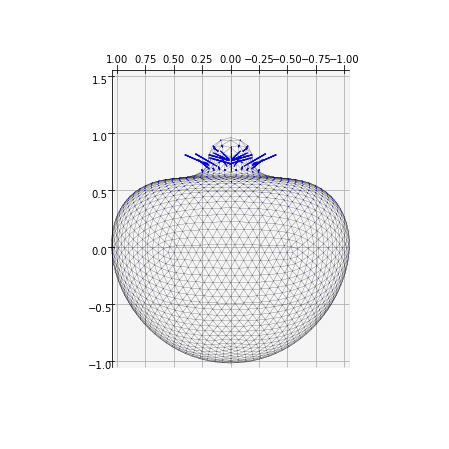

In [40]:
rp=0.20
rho=0.1*rp
x=np.amax(v_init[:,0])-rp-1*rho
y=0
z=0
fig = plt.figure(figsize =(14, 8))
ax = plt.axes(projection ='3d')
surf=ax.plot_trisurf(v[:,0], v[:,1], v[:,2], triangles = f, edgecolor=[[0,0,0]], linewidth=0.05, alpha=0.0, shade=False)
u, v1 = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x1 = (rp*(np.cos(u) * np.sin(v1)))+x
y1 = (rp*(np.sin(u) * np.sin(v1)))
z1 = (rp*(np.cos(v1)))
#surf=ax.plot_surface(x1, y1, z1)
ax.view_init(90,180)
ax = plt.gca()
ax.set_xlim([-1, 1.5])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_proj_type('ortho')
ax.set_box_aspect((xmax-xmin, ymax-ymin,ymax-ymin))
ax.set_zticks([])
# Plot the vector field
ax.quiver(v[:, 0], v[:, 1], v[:, 2], mat_bending[:, 0], mat_bending[:, 1], mat_bending[:, 2],length=2.0,color='blue', pivot='tail' ,arrow_length_ratio=1,linewidth=1,edgecolors='black')



In [25]:
# Get row indices of zero elements in matrix a
zero_rows = np.where((mat_adhesion == 0).all(axis=1))[0]

# Make corresponding rows of matrix b zero
mat_bending[zero_rows, :] = 0

# Print the results
#print("Matrix a:\n", a)
#print("Matrix b:\n", b)

In [7]:
print("Matrix b:\n", mat_bending[2000:2200])

Matrix b:
 [[-8.00667e-03  4.69568e-03  7.87092e-03]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 2.19456e-03 -1.37305e-03  4.82010e-04]
 [ 4.52430e-02 -1.03226e-01  2.75338e-02]
 [-2.52882e-02  8.90362e-02 -1.64342e-02]
 [-7.52981e-03  9.10723e-03 -1.22081e-15]
 [ 1.98703e-03 -9.48171e-04 -5.27757e-04]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 3.82723e-02 -4.56727e-02  2.43121e-02]
 [-2.48390e-02  9.11229e-02 -5.10451e-02]
 [-1.44070e-02  1.98263e-02 -1.11426e-02]
 [ 1.98703e-03 -9.48171e-04  5.27757e-04]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 2.22938e-03 -1.23130e-03  8.80746e-04]
 [ 4.61820e-02 -8.01945e-02  7.38483e-02]
 [-2.53917e-02  5.39298e-02 -6.10727e-02]
 [-8.00667e-03  4.69568e-03 -7.87092e-03]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000